# Actividad 2: Aliasing

- Consideremos la siguiente señal periódica con componentes 1Hz, 12Hz y 23Hz, respectivamente

$$
s(t) = \cos(2\pi t) + 0.5 \cos(2\pi 12 t) + 0.25 \cos(2\pi 23 t)
$$

- Escribamos una función que calcule y gráfique el espectro de amplitud y fase. Estudiemos y entendamos sus componentes
- Remuestremos la señal (disminuir su frecuecia de muestreo) y observemos el espectro resultante. Detectemos los componentes erroneos o aliases en el nuevo espectro
- Use el resultado del teorema del muestreo para reconstruir la señal original en cada caso 

$$
s(t) = \sum_{n=-\infty}^{\infty} s[n] \text{sinc}(\pi F_s (t - n /F_s) )
$$




In [5]:
Fs = 50
t_50 = np.arange(0, 5, step=1/Fs)
s_50 = s(t_50)


<IPython.core.display.Javascript object>


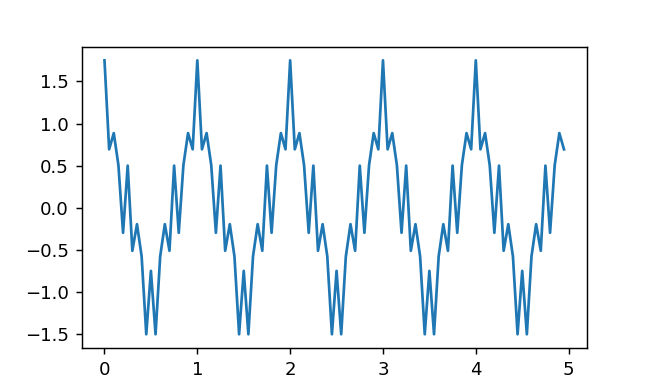

In [15]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

Fs = 20
t = np.arange(0, 5, step=1/Fs)
s = lambda t: np.cos(2.0*np.pi*t) + 0.5*np.cos(2.0*np.pi*t*12) + 0.25*np.cos(2.0*np.pi*t*23)

fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(t, s(t))

<IPython.core.display.Javascript object>


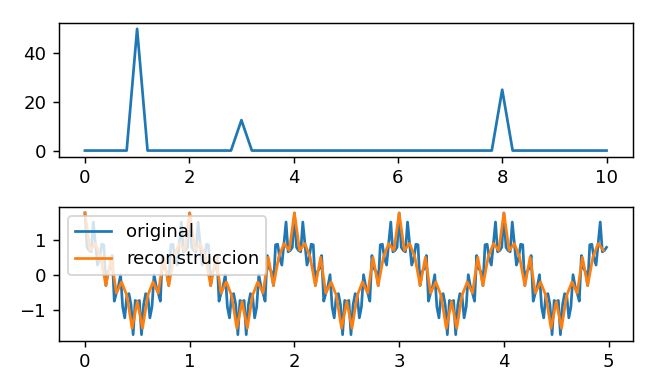

In [16]:
import scipy.fft as sfft

def spectrum(s, Fs):
    freq = sfft.rfftfreq(n=len(s), d=1/Fs)
    S = sfft.rfft(s)
    return freq, np.absolute(S), np.angle(S)

f, SA, SP = spectrum(s(t), Fs)
fig, ax = plt.subplots(2, figsize=(5, 3), tight_layout=True)
ax[0].plot(f, SA)
ax[1].plot(t_50, s_50, label='original')
ax[1].plot(t, sfft.irfft(SA*np.exp(1j*SP)), label='reconstruccion')
plt.legend()